<a href="https://colab.research.google.com/github/Kishan-Kumar-Zalavadia/Material-Science/blob/main/code_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
# Define column names
x_axis = 't.strain.1'
y1_axis = 't.stress.1'
y2_axis = 'hard.Rate.1'

# Set the value of k for spline interpolation
k_value = 5

Cubic Polynomial Coefficients: [-7.77578400e+06  6.41864054e+06 -2.74195376e+06  5.80610651e+05
 -5.52780184e+04  4.67526422e+03]

Polynomial Equation: -7775783.999996 x^5 + 6418640.539998 x^4 + -2741953.759280 x^3 + 580610.650721 x^2 + -55278.018374 x^1 + 4675.264223

Derivative Equation: -38878919.999980 x^4 + 25674562.159993 x^3 + -8225861.277839 x^2 + 1161221.301441 x^1 + -55278.018374

Roots (Zeros) of the Derivative Equation: [0.20298763+0.22761187j 0.20298763-0.22761187j 0.15708383+0.j
 0.09731321+0.j        ]

For x = 0.202988+0.227612j, y = 6616.492183+1684.242467j
For x = 0.202988-0.227612j, y = 6616.492183-1684.242467j
For x = 0.157084+0.000000j, y = 2855.089825+0.000000j
For x = 0.097313+0.000000j, y = 2775.212010+0.000000j



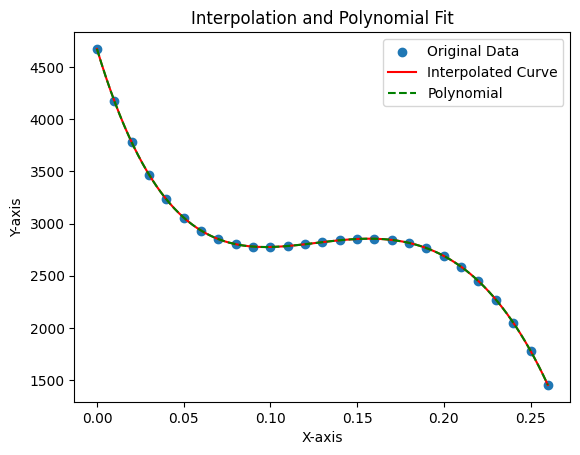

In [138]:
import numpy as np
import pandas as pd
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt

# Read Excel file
file_path = '/content/Data.xlsx'
df = pd.read_excel(file_path)

# Remove the last row
df = df.drop(df.tail(2).index)

# Extract x and y columns
x = df[x_axis].values
y = df[y2_axis].values


# Check for and handle NaN or infinite values
mask = np.isfinite(x) & np.isfinite(y)
x = x[mask]
y = y[mask]


# Perform cubic spline interpolation
spline_interp = make_interp_spline(x, y, k=k_value)


# Perform cubic spline interpolation
spline_interp = make_interp_spline(x, y, k=k_value)

# Generate new x values for interpolation
x_new = np.linspace(min(x), max(x), 100)

# Perform interpolation
y_new = spline_interp(x_new)

# Fit cubic polynomial to the entire dataset
coefficients = np.polyfit(x, y, k_value)

# Print the coefficients
print("Cubic Polynomial Coefficients:", coefficients)

# Generate y values for the cubic polynomial
y_cubic = np.polyval(coefficients, x_new)

# Dynamic equation print
cubic_equation = "Polynomial Equation: "
for i, coef in enumerate(coefficients):
    cubic_equation += f"{coef:.6f} x^{k_value-i} + " if i < k_value else f"{coef:.6f}"
print()

# Remove the trailing ' + ' at the end
cubic_equation = cubic_equation.rstrip(' + ')
print(cubic_equation)
print()

# Take the derivative of the polynomial
derivative_coefficients = np.polyder(coefficients)

# Dynamic equation print for the derivative
derivative_equation = "Derivative Equation: "
for i, coef in enumerate(derivative_coefficients):
    derivative_equation += f"{coef:.6f} x^{k_value-1 -i} + " if i < k_value-1 else f"{coef:.6f}"
    # cubic_equation += f"{coef:.6f} x^{k_value-i} + " if i < k_value else f"{coef:.6f}"

# Remove the trailing ' + ' at the end
derivative_equation = derivative_equation.rstrip(' + ')
print(derivative_equation)
print()

# Find the roots (zeros) of the derivative equation
roots = np.roots(derivative_coefficients)
print("Roots (Zeros) of the Derivative Equation:", roots)
print()

# Calculate y values for each root using the original cubic polynomial
y_roots = np.polyval(coefficients, roots)

# Print the corresponding y values for the roots
for i, root in enumerate(roots):
    print(f"For x = {root:.6f}, y = {y_roots[i]:.6f}")
print()

# Plot the original data, interpolated curve, and cubic polynomial
plt.scatter(x, y, label='Original Data')
plt.plot(x_new, y_new, label='Interpolated Curve', color='red')
plt.plot(x_new, y_cubic, label='Polynomial', linestyle='dashed', color='green')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title('Interpolation and Polynomial Fit')
plt.show()


In [139]:
# Sort the y_roots array
y_roots_sorted = np.sort(y_roots)

# Find the differences between consecutive roots
differences = np.diff(y_roots_sorted)

# Find the index of the minimum difference
min_diff_index = np.argmin(differences)

# Determine the indices of the two closest roots
index1 = min_diff_index
index2 = min_diff_index + 1

# Store the minimum and maximum values
min_b0 = min(y_roots_sorted[index1], y_roots_sorted[index2])
max_b0 = max(y_roots_sorted[index1], y_roots_sorted[index2])

print("Minimum b0:", min_b0)
print("Maximum b0:", max_b0)


Minimum b0: (6616.4921833305225-1684.242467261384j)
Maximum b0: (6616.4921833305225+1684.242467261384j)


# Find D1

In [140]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Point   |   x       |   y       |   Slope
---------------------------------------------
1       |   0.000   |   4675.264   |   -55251.981
2       |   0.010   |   4177.867   |   -44470.017
3       |   0.020   |   3781.015   |   -35142.844
4       |   0.030   |   3470.451   |   -27183.381
5       |   0.040   |   3233.271   |   -20446.717
6       |   0.050   |   3057.832   |   -14815.264
7       |   0.060   |   2933.659   |   -10175.945
8       |   0.070   |   2851.348   |   -6426.306
9       |   0.080   |   2802.478   |   -3472.879
10       |   0.090   |   2779.516   |   -1231.616
11       |   0.100   |   2775.721   |   372.221
12       |   0.110   |   2785.054   |   1404.035
13       |   0.120   |   2802.082   |   1919.898
14       |   0.130   |   2821.888   |   1966.552
15       |   0.140   |   2839.974   |   1581.407
16       |   0.150   |   2852.170   |   792.544
17       |   0.160   |   2854.542   |   -381.289
18       |   0.170   |   2843.293   |   -1930.675
19       |   0.180   | 

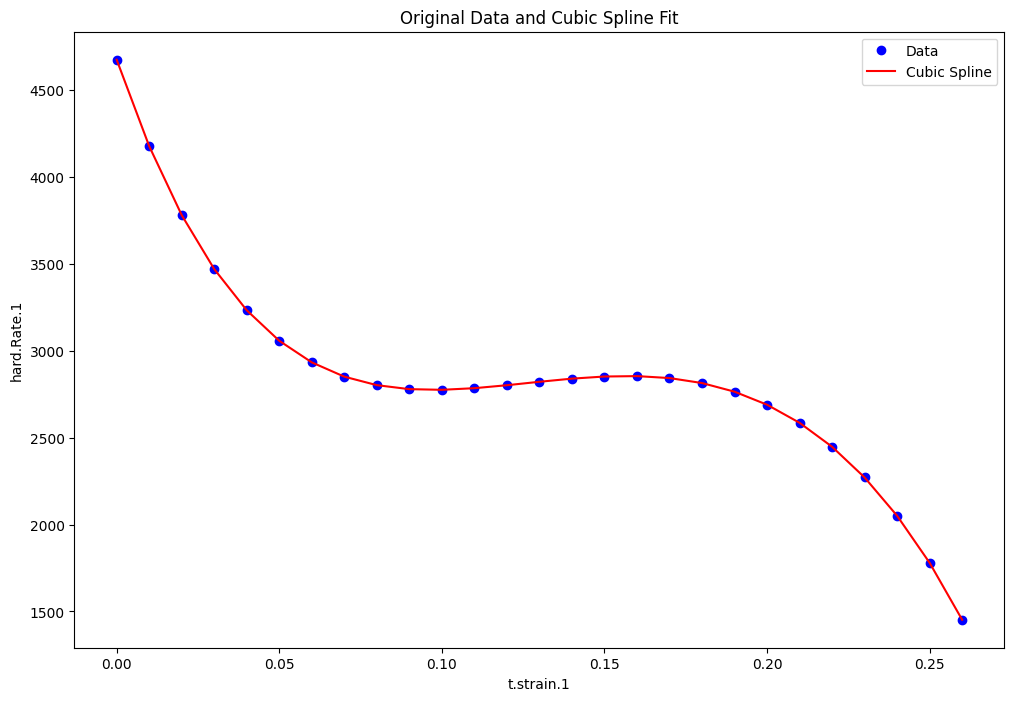

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

column_names = [x_axis, y2_axis]

# Read only the specified columns from Excel file
data = pd.read_excel("/content/Data.xlsx", usecols=column_names)

# Drop rows with missing or non-finite values
data.dropna(inplace=True)

# Extract x and y values
x = data[column_names[0]].values
y = data[column_names[1]].values

# Fit a cubic spline to the data
cs = CubicSpline(x, y)

# Calculate the slope for each data point
slopes = cs(x, 1)

# Print the slopes along with their corresponding x and y values
print("Point   |   x       |   y       |   Slope")
print("---------------------------------------------")
for i, (x_val, y_val, slope_val) in enumerate(zip(x, y, slopes)):
    print(f"{i+1}       |   {x_val:.3f}   |   {y_val:.3f}   |   {slope_val:.3f}")

# Plot the original data and cubic spline
plt.figure(figsize=(12, 8))
plt.plot(x, y, 'bo', label='Data')
plt.plot(x, cs(x), 'r-', label='Cubic Spline')
plt.xlabel(column_names[0])
plt.ylabel(column_names[1])
plt.title('Original Data and Cubic Spline Fit')
plt.legend()

plt.show()


Data Point | x Value | y Value | Difference | Slope:
----------------------------------------------------
1       |   0.000   |   4675.264   |   10781.965   |   -55251.981
2       |   0.010   |   4177.867   |   9327.173   |   -44470.017
3       |   0.020   |   3781.015   |   7959.462   |   -35142.844
4       |   0.030   |   3470.451   |   6736.665   |   -27183.381
5       |   0.040   |   3233.271   |   5631.453   |   -20446.717
6       |   0.050   |   3057.832   |   4639.319   |   -14815.264
7       |   0.060   |   2933.659   |   3749.638   |   -10175.945
8       |   0.070   |   2851.348   |   2953.428   |   -6426.306
9       |   0.080   |   2802.478   |   2241.263   |   -3472.879
10       |   0.090   |   2779.516   |   1603.837   |   -1231.616
11       |   0.100   |   2775.721   |   1031.814   |   372.221
12       |   0.110   |   2785.054   |   515.863   |   1404.035
13       |   0.120   |   2802.082   |   46.654   |   1919.898
14       |   0.130   |   2821.888   |   -385.144   |   19

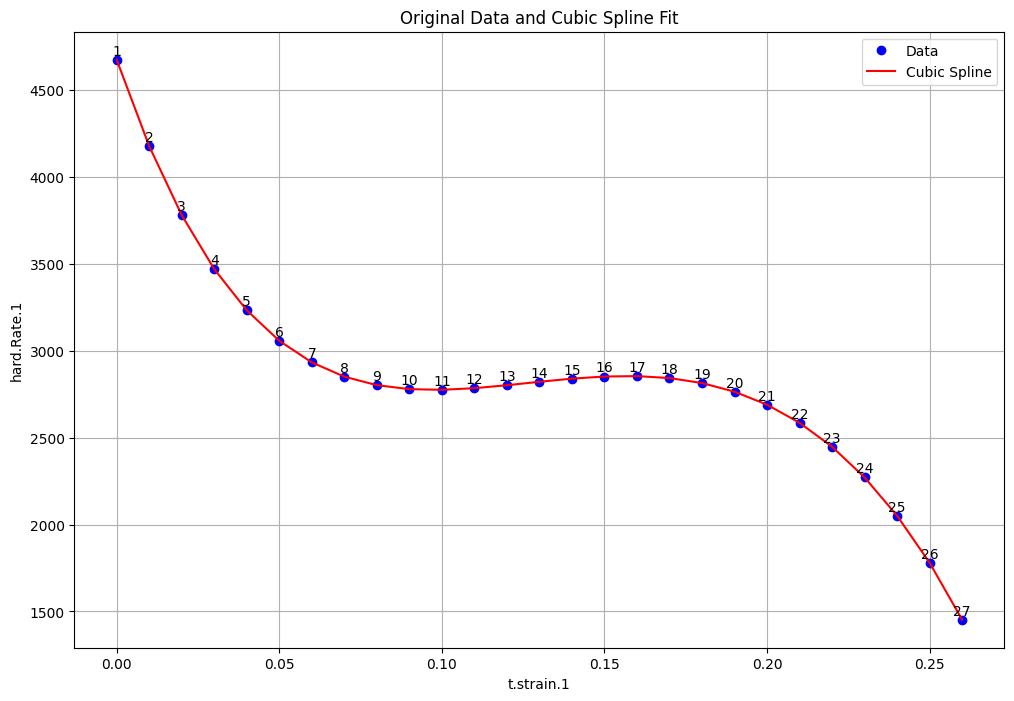

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Define the column names
column_names = [x_axis, y2_axis]

# Read only the specified columns from Excel file
data = pd.read_excel("/content/Data.xlsx", usecols=column_names)

# Drop rows with missing or non-finite values
data.dropna(inplace=True)

# Extract x and y values
x = data[column_names[0]].values
y = data[column_names[1]].values

# Fit a cubic spline to the data
cs = CubicSpline(x, y)

# Calculate the slope for each data point
slopes = cs(x, 1)

# Calculate the differences between consecutive slopes
slope_diffs = np.diff(slopes)

# Plot the original data and cubic spline
plt.figure(figsize=(12, 8))
plt.plot(x, y, 'bo', label='Data')
plt.plot(x, cs(x), 'r-', label='Cubic Spline')
plt.xlabel(column_names[0])
plt.ylabel(column_names[1])
plt.title('Original Data and Cubic Spline Fit')
plt.legend()

# Add point numbers with a gap above the points in the plot
gap = 50  # Adjust the gap as needed
for i, (x_val, y_val) in enumerate(zip(x, y)):
    slope = slopes[i]
    plt.text(x_val, y_val + gap, f"{i+1}", fontsize=10, ha='center', va='center')
plt.grid(True)

# Create a table for slopes for each point
slope_data = {'Point Number': np.arange(1, len(x) + 1), 'Slope': slopes}
slope_table = pd.DataFrame(slope_data)

# Store data point, x, y, and its difference in a new array
data_and_differences = np.column_stack((x[:-1], y[:-1], slope_diffs, slopes[:-1]))

print("Data Point | x Value | y Value | Difference | Slope:")
print("----------------------------------------------------")
for i, (x_val, y_val, diff, slope) in enumerate(data_and_differences):
    print(f"{i+1}       |   {x_val:.3f}   |   {y_val:.3f}   |   {diff:.3f}   |   {slope:.3f}")

plt.show()


### Remove all negative slopes

Data Point | x Value | y Value | Difference | Slope:
----------------------------------------------------
1       |   0.100   |   2775.721   |   1031.814   |   372.221
2       |   0.110   |   2785.054   |   515.863   |   1404.035
3       |   0.120   |   2802.082   |   46.654   |   1919.898
4       |   0.130   |   2821.888   |   -385.144   |   1966.552


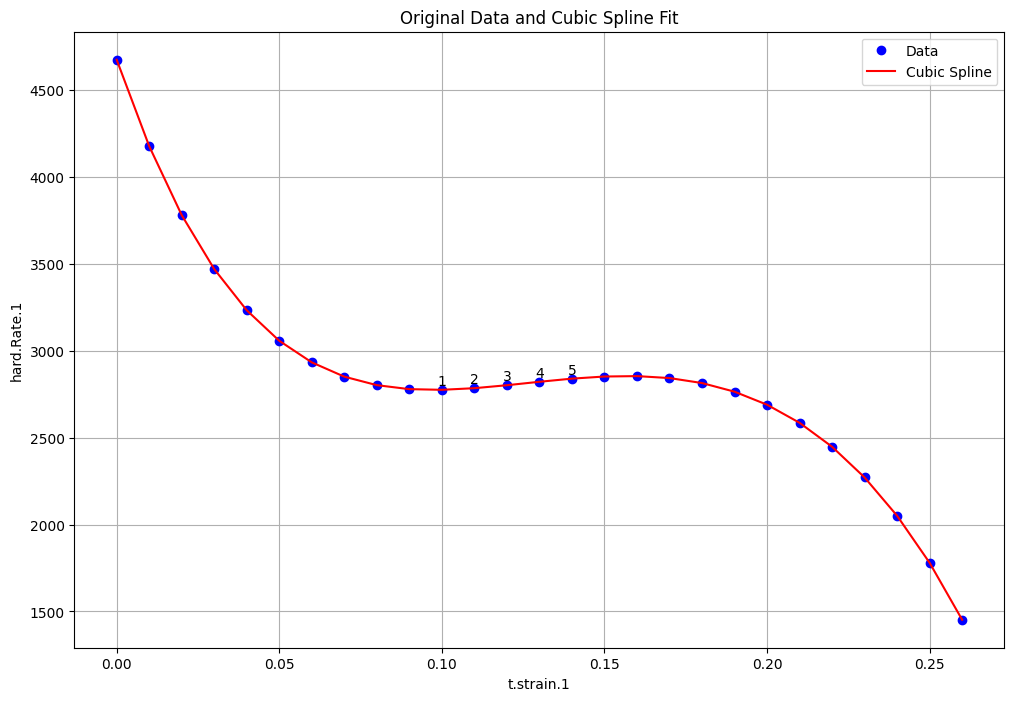

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Define the column names
column_names = [x_axis, y2_axis]

# Read only the specified columns from Excel file
data = pd.read_excel("/content/Data.xlsx", usecols=column_names)

# Drop rows with missing or non-finite values
data.dropna(inplace=True)

# Extract x and y values
x = data[column_names[0]].values
y = data[column_names[1]].values

# Fit a cubic spline to the data
cs = CubicSpline(x, y)

# Calculate the slope for each data point
slopes = cs(x, 1)

# Filter out negative slopes and their corresponding x, y values
positive_slope_indices = np.where(slopes > 0)[0]
x_positive = x[positive_slope_indices]
y_positive = y[positive_slope_indices]

# Calculate the differences between consecutive slopes
slope_diffs = np.diff(slopes[positive_slope_indices])

# Consider only the first 10 values or the available maximum
max_values = min(5, len(x_positive))
x_positive = x_positive[:max_values]
y_positive = y_positive[:max_values]
slope_diffs = slope_diffs[:max_values-1]  # As there are max_values-1 differences for max_values values

# Plot the original data and cubic spline
plt.figure(figsize=(12, 8))
plt.plot(x, y, 'bo', label='Data')
plt.plot(x, cs(x), 'r-', label='Cubic Spline')
plt.xlabel(column_names[0])
plt.ylabel(column_names[1])
plt.title('Original Data and Cubic Spline Fit')
plt.legend()

# Add point numbers with a gap above the points in the plot
gap = 50  # Adjust the gap as needed
for i, (x_val, y_val) in enumerate(zip(x_positive, y_positive)):
    plt.text(x_val, y_val + gap, f"{i+1}", fontsize=10, ha='center', va='center')
plt.grid(True)

# Store data point, x, y, and its difference in a new array
data_and_differences = np.column_stack((x_positive[:-1], y_positive[:-1], slope_diffs, slopes[positive_slope_indices][:max_values-1]))

print("Data Point | x Value | y Value | Difference | Slope:")
print("----------------------------------------------------")
for i, (x_val, y_val, diff, slope) in enumerate(data_and_differences):
    print(f"{i+1}       |   {x_val:.3f}   |   {y_val:.3f}   |   {diff:.3f}   |   {slope:.3f}")

plt.show()


Data Point | x Value | y Value | Difference | Slope:
----------------------------------------------------
1       |   0.100   |   2775.721   |   1031.814   |   372.221
2       |   0.110   |   2785.054   |   515.863   |   1404.035
3       |   0.120   |   2802.082   |   46.654   |   1919.898
4       |   0.130   |   2821.888   |   -385.144   |   1966.552

Average Slope of Printed Slopes: 1415.676331885907


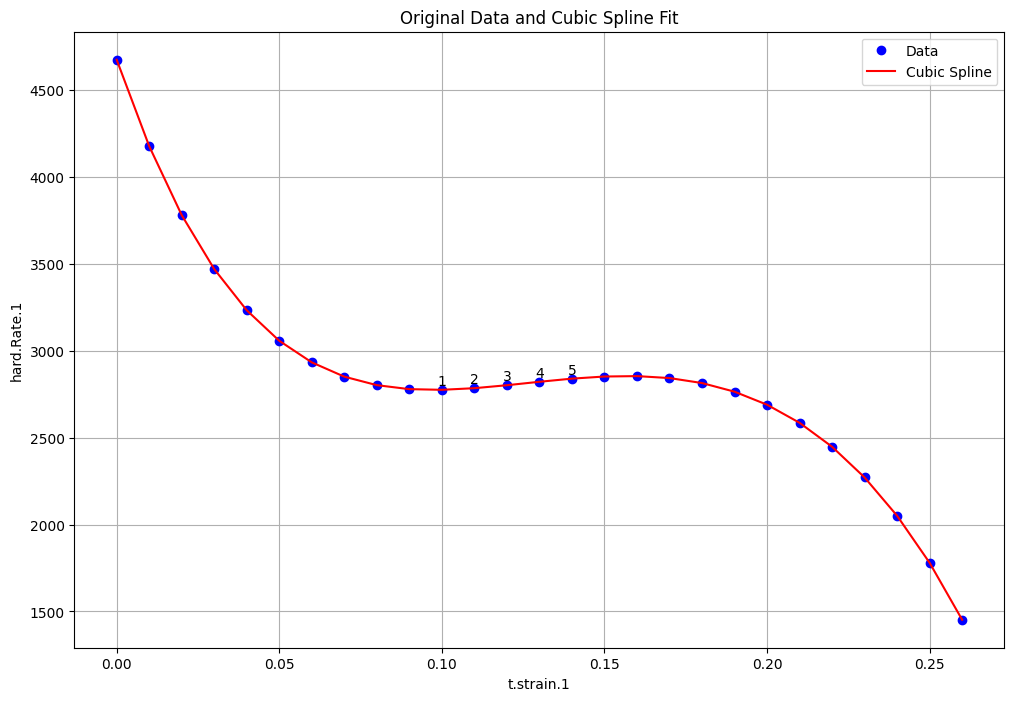

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Define the column names
column_names = [x_axis, y2_axis]

# Read only the specified columns from Excel file
data = pd.read_excel("/content/Data.xlsx", usecols=column_names)

# Drop rows with missing or non-finite values
data.dropna(inplace=True)

# Extract x and y values
x = data[column_names[0]].values
y = data[column_names[1]].values

# Fit a cubic spline to the data
cs = CubicSpline(x, y)

# Calculate the slope for each data point
slopes = cs(x, 1)

# Filter out negative slopes and their corresponding x, y values
positive_slope_indices = np.where(slopes > 0)[0]
x_positive = x[positive_slope_indices]
y_positive = y[positive_slope_indices]

# Calculate the differences between consecutive slopes
slope_diffs = np.diff(slopes[positive_slope_indices])

# Consider only the first 10 values or the available maximum
max_values = min(5, len(x_positive))
x_positive = x_positive[:max_values]
y_positive = y_positive[:max_values]
slope_diffs = slope_diffs[:max_values-1]  # As there are max_values-1 differences for max_values values

# Initialize an empty array to store the slopes for which the information is printed
printed_slopes = []

# Plot the original data and cubic spline
plt.figure(figsize=(12, 8))
plt.plot(x, y, 'bo', label='Data')
plt.plot(x, cs(x), 'r-', label='Cubic Spline')
plt.xlabel(column_names[0])
plt.ylabel(column_names[1])
plt.title('Original Data and Cubic Spline Fit')
plt.legend()

# Add point numbers with a gap above the points in the plot
gap = 50  # Adjust the gap as needed
for i, (x_val, y_val) in enumerate(zip(x_positive, y_positive)):
    plt.text(x_val, y_val + gap, f"{i+1}", fontsize=10, ha='center', va='center')
    printed_slopes.append(slopes[positive_slope_indices][i])

plt.grid(True)

# Store data point, x, y, and its difference in a new array
data_and_differences = np.column_stack((x_positive[:-1], y_positive[:-1], slope_diffs, printed_slopes[:-1]))

print("Data Point | x Value | y Value | Difference | Slope:")
print("----------------------------------------------------")
for i, (x_val, y_val, diff, slope) in enumerate(data_and_differences):
    print(f"{i+1}       |   {x_val:.3f}   |   {y_val:.3f}   |   {diff:.3f}   |   {slope:.3f}")

# Calculate the average of the slopes
average_slope_printed = np.mean(printed_slopes[:-1])
print("\nAverage Slope of Printed Slopes:", average_slope_printed)

plt.show()
